# Trabalho 03 - Teste-T

#### Marrielly Chrystina Martines



O objetivo desta tarefa é explorar o conjunto de dados "*mini_mnist.csv*", que contém imagens de dígitos 0-9 manuscritos, e implementar um sistema de classificação usando os classificadores KNN e CSV, que irão categorizar cada imagem. Será empregada a técnica PCA para reduzir a dimensionalidade do conjunto de dados e o desempenho dos classificadores será avaliado por meio de validação cruzada em dois níveis.

In [49]:
import pandas as pd
import seaborn as sns
import numpy as np

from tqdm.notebook import tqdm
from scipy.stats import ttest_ind_from_stats

from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score

In [31]:
df = pd.read_csv('mini_mnist.csv')
df

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,digito
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1142,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
1143,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1144,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


In [32]:
nan = df.isnull()
nan.sum()

pixel_0      0
pixel_1      0
pixel_2      0
pixel_3      0
pixel_4      0
            ..
pixel_780    1
pixel_781    1
pixel_782    1
pixel_783    1
digito       1
Length: 785, dtype: int64

In [33]:
df = df.dropna()
df

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,digito
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
1141,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1142,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
1143,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


## PCA

Após a  visualização do espaço formado pelo conjunto de atributos, será usado o PCA para reduzir a dimensionalidade, de forma a facilitar a análise visualmente.

In [36]:
x = df.drop('digito', axis=1)
y = df['digito']

pca = PCA(n_components=2)
pca.fit(x)
x_pca = pca.transform(x)
x_pca_df = pd.DataFrame(x_pca, columns=['PC 0', 'PC 1'])

Para compreender melhor os resultados do PCA, plota-se um scatterplot, que pode ser visto a seguir:

<Axes: xlabel='PC 0', ylabel='PC 1'>

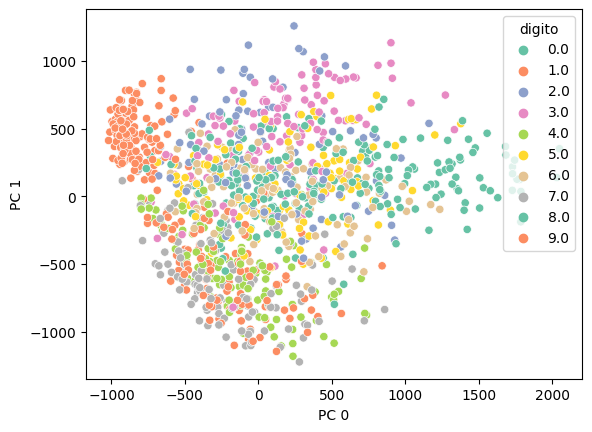

In [37]:
sns.scatterplot(data=x_pca_df, x='PC 0', y='PC 1', hue=df['digito'], palette="Set2")

Embora o PCA tenha diminuído a dimensionalidade, ainda não há uma boa separabilidade, o que afeta a definição de um conjunto de atributos que possa ser utilizado para a segregação de classes.

## KNN

Aqui é avaliado o desempenho do classificador KNN, usando validação cruzada em dois níveis. No primeiro nível, a validação cruzada é feita em 10 vias, enquanto no segundo nível é feita em 5 vias.

In [38]:
def do_cv_knn(x, y, cv_splits, ks):

    #usa o protocolo de validação cruzada estratificada
    skf = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=1)

    acuracias = []

    ## cria progress bar
    pgb = tqdm(total=cv_splits, desc='Folds avaliados')
    
    #a função split retorna os índices das instâncias que devem ser usadas para o treinamento e o teste.
    for idx_treino, idx_teste in skf.split(x, y):
        
        #extrai as instâncias de treinamento de acordo com os índices fornecidos pelo skf.split
        x_treino = x[idx_treino]
        y_treino = y[idx_treino]
        
        #extrai as instâncias de teste de acordo com os índices fornecidos pelo skf.split
        x_teste = x[idx_teste]
        y_teste = y[idx_teste]
        
        #coloca todas as variáveis na mesma escala, usando o conjunto de treinamento para calcular os parâmetros da escala
        ss = StandardScaler()
        ss.fit(x_treino)
        x_treino = ss.transform(x_treino)
        x_teste = ss.transform(x_teste)
        
        #combinações de parâmetros otimizados, otimizando o número de vizinhos mais próximos para o knn (k)
        params = {'n_neighbors' : range(1,30,2)}
        #instancia um KNN com parâmetros padrão
        knn = KNeighborsClassifier()
        #instancia um GridSearchCV com ks vias.
        knn = GridSearchCV(knn, params, cv=StratifiedKFold(n_splits=ks))    #busca exaustiva para otimização de hiperparâmetro por validação cruzada
        #realiza a otimização dos hiperparâmetros e treina o modelo final com a melhor combinação de hiperparâmetros com todos os dados de treinamento
        knn.fit(x_treino, y_treino)
        
        #calcula a acurácia no conjunto de testes desta iteração e salva na lista.
        acuracias.append(accuracy_score(y_teste, knn.predict(x_teste)))

        #atualiza o progress bar
        pgb.update(1)
        
    #fecha o progress bar
    pgb.close()
        
    return acuracias

In [41]:
accs_knn = do_cv_knn(x_pca, y.values, 10, 5)

Folds avaliados:   0%|          | 0/10 [00:00<?, ?it/s]

In [42]:
#calcula as estatísticas da validação cruzada, que nos dá uma confiança que, na média, este é o desempenho esperado do classificador no mundo real
print(' Acurácia Máxima: %.3f\n Acurácia Mínima: %.3f' % ( max(accs_knn), min(accs_knn)))
print(' Acurácia Média: %.3f\n Desvio Padrão: %.3f \n' % (np.mean(accs_knn), np.std(accs_knn)))

 Acurácia Máxima: 0.439
 Acurácia Mínima: 0.360
 Acurácia Média: 0.412
 Desvio Padrão: 0.022 



## CSV

Aqui é avaliado o desempenho do classificador CSV, da mesma forma que foi avaliado anteriormente.

In [44]:
def do_cv_svm(x, y, cv_splits, ks, Cs=[1], gammas=["scale"]):

    ## validação cruzada estratificada
    skf = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=1)

    acuracias = []

    ## cria progress bar
    pgb = tqdm(total=cv_splits, desc='Folds avaliados')
    
    for treino_idx, teste_idx in skf.split(x, y):
        
        #extrai as instâncias de treinamento de acordo com os índices fornecidos pelo skf.split
        x_treino = x[treino_idx]
        y_treino = y[treino_idx]

        #extrai as instâncias de teste de acordo com os índices fornecidos pelo skf.split
        x_teste = x[teste_idx]
        y_teste = y[teste_idx]

        #coloca todas as variáveis na mesma escala, usando o conjunto de treinamento para calcular os parâmetros da escala
        ss = StandardScaler()
        ss.fit(x_treino)
        x_treino = ss.transform(x_treino)
        x_teste = ss.transform(x_teste)

        #combinações de parâmetros otimizados, de forma a selecionar a melhor combinação de C e γ
        params = {
            "C": Cs,
            "gamma": gammas
        }
        #instancia uma SVM usando o kernel rbf
        svm = SVC(kernel="rbf")
        #instancia um GridSearchCV com ks vias
        svm = GridSearchCV(svm, params, n_jobs=2, cv=StratifiedKFold(ks))
        #realiza a otimização dos hiperparâmetros e treina o modelo final com a melhor combinação de hiperparâmetros com todos os dados de treinamento
        svm.fit(x_treino, y_treino)

        pred = svm.predict(x_teste)

        #calcula a acurácia no conjunto de testes desta iteração e salva na lista.
        acuracias.append(accuracy_score(y_teste, pred))
        
        #atualiza o progress bar
        pgb.update(1)
        
    #fecha o progress bar
    pgb.close()
    
    return acuracias

In [46]:
accs_svm = do_cv_svm(x_pca, y.values, 10, 5, np.logspace(-3, 4, 8), np.logspace(-3, 4, 8))

Folds avaliados:   0%|          | 0/10 [00:00<?, ?it/s]

In [47]:
print(' Acurácia Máxima: %.3f\n Acurácia Mínima: %.3f' % ( max(accs_svm), min(accs_svm)))
print(' Acurácia Média: %.3f\n Desvio Padrão: %.3f \n' % (np.mean(accs_svm), np.std(accs_svm)))

 Acurácia Máxima: 0.518
 Acurácia Mínima: 0.386
 Acurácia Média: 0.437
 Desvio Padrão: 0.037 



## Teste T

Para verificar se os resultados obtidos com o classificador KNN e com a SVM são estatisticamente diferentes, é feito o Teste-T (teste de hipótese nula).

In [50]:
ttest_ind_from_stats(np.mean(accs_knn), np.std(accs_knn), 10, np.mean(accs_svm), np.std(accs_svm), 10)

Ttest_indResult(statistic=-1.7883539629355627, pvalue=0.09056424455646285)

In [51]:
def rejeitar_hip_nula(med1, desv1, n1, med2, desv2, n2, alpha=0.05):
  _, p = ttest_ind_from_stats(med1, desv1, n1, med2, desv2, n2)
  return p <= alpha, p

In [52]:
rejeitar_hip_nula(np.mean(accs_knn), np.std(accs_knn), 10, np.mean(accs_svm), np.std(accs_svm), 10)

(False, 0.09056424455646285)

Como resultado, tem-se que não é possível rejeitar a hipótese nula, ou seja, ambos classificadores não possuem uma diferença significativa em seus desempenhos. Ou seja, não importa se será usado o classificador KNN ou a SVM, pois ambos apresentam acurácias muito próximas.